# Convolutional Neural Network Architectures 2 - AlexNet

After the success of LeNet-5, the field of computer vision witnessed a major breakthrough with the introduction of the AlexNet architecture. Proposed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton in 2012, this architecture marked a significant advancement in convolutional neural network (CNN) models. Their paper, titled [ImageNet Classification with Deep Convolutional Neural Networks](https://proceedings.neurips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) presented a CNN architecture that achieved a remarkable improvement in accuracy on computer vision tasks, demonstrating the superiority of deep learning over traditional machine learning techniques. Before AlexNet, computer vision problems were primarily tackled using conventional machine learning methods where people tried to improve feature engineering techniques rather than models to improve generalization error. The AlexNet architecture has a similar structure to LeNet-5 but much deeper and incorporates new techniques to improve generalization. AlexNet was able to win the ImageNet Challenge in 2012 with a top-five error rate of just 15%, solidifying its position as a game-changer in the field of computer vision. Let's get started understanding the architecture.


<img src="imgs/alexnet.svg" width="40%">
<a href="https://d2l.ai/_images/alexnet.svg"> Source </a>


In the left, you see the LeNet-5 architecture and in the right we have the AlexNet. Let's summarize the layers

1. The input layer takes an image of size 224x224x3
2. The architecture has five convolutional layers. The first convolutional layer has 96 filters of size 11x11x3 with a stride of 4. The second convolutional layer has 256 filters of size 5x5x48 (48 is the number of channels from the previous layer) with a stride of 1. The third convolutional layer has 384 filters of size 3x3x256 with a stride of 1. The fourth convolutional layer has 384 filters of size 3x3x192  with a stride of 1. Lastly, the fifth convolutional layer has 256 filters of size 3x3x192 with a stride of 1. All of the convolutional layers use the ReLU activation function.

   The use of large kernel sizes, such as the 11x11 kernels in AlexNet, is not common today due to the higher computational cost and the emergence of better alternatives. It has been found that stacking kernels with smaller sizes generally leads to better performance in terms of both computational efficiency and accuracy. However, the large kernels can be visualized as 11x11x3 images, which helps to better understand the features learned by the network in this layer. The authors of the original paper provided the filters learned in the first convolutional layer, which can be seen in the image below. These filters are responsible for detecting simple features such as edges and colors in the input image. Some of the learned filters detect vertical edges, while others detect horizontal edges or specific colors. As we previously discussed, these low-level features are assembled into higher-level features in the subsequent layers of the network.  

<img src="imgs/img15.png" width="40%">
<a href="https://proceedings.neurips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf"> Source </a>
  
4. The first, and second convolutional layers are followed by Max Pooling Layers with a filter size of 3x3 and a stride of 2.
5. The flattening layer flattens the output from the previous layer into a 1D vector. The layer is followed by three fully connected layers, two of which have 4096 neurons and the last layer (output layer) has 1000 neurons (corresponding to the 1000 classes in the ImageNet dataset).

## Understanding the Innovations that Propelled AlexNet to Success

### 1.  The choice of activation function:

Today, it is widely known that using ReLU activation functions in the intermediate layers of Deep Neural Networks is more efficient. However, in 2012, this was not a popular choice. The AlexNet paper demonstrated that ReLU outperformed traditional activation functions, such as sigmoid and hyperbolic tangent, in terms of both training speed and generalization performance. As a result, AlexNet played a significant role in popularizing the use of ReLU activation functions in deep learning.

*  A four-layer convolutional neural network with ReLUs (solid line) reaches a 25% training error rate on CIFAR-10 six times faster than an equivalent network with tanh neurons - [Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2017)](https://proceedings.neurips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

### 2. Local Response Normalization

$$b^i_{x,y}=a^i_{x,y}\left(k+\alpha \sum _{j=l}^u\:\left(a^{\:j}_{x,y}\right)^2\right)^{\beta }\:\:where\:\:u=min\left(N-1,\frac{i+n}{2}\right)\:and\:l=max\left(0,i-\frac{n}{2}\right)$$


The AlexNet paper introduced a new normalization technique called Local Response Normalization (LRN). This layer is applied after the C1 and C3 layers to normalize the outputs of a layer by dividing each output by a normalization factor computed based on the responses of nearby neurons in the same feature map. The purpose of this normalization is to enhance the selectivity of the network by encouraging neurons with different preferred stimuli to be more active (thereby enhancing local contrast). This lateral inhibition creates competition among neurons within the same feature map, leading to sparsity in the representations and reducing overfitting. This behavior is observed in biological neurons and is named Lateral Inhibition.

However, LRN is less commonly used nowadays, as it has been found to be less effective than other normalization techniques, such as Batch Normalization. Therefore, in my implementation of AlexNet, I will not include this layer type. However, you can find a version of AlexNet that includes Local Response Normalization in the architectures folder of this repository and try it out as you wish.


### 3. Overlapping Max Pooling

The AlexNet architecture employs overlapping pooling layers achieved by setting the stride to be less than the pooling window size, leading to overlapping regions between adjacent pooling operations. This approach helps the network to avoid focusing solely on dominant features and preserve spatial information, leading to better preservation of details in the feature maps. This, in turn, can improve generalization by reducing the risk of overfitting.

* We generally observe during training that models with overlapping pooling find it slightly more difficult to overfit. - [Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2017)](https://proceedings.neurips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

Overlapping Max Pooling is not again commonly used today as I guess it makes the models computationally more expensive and do not reduce the risk of overfitting much compared to other techniques we have now.

### 4. Dropout

The AlexNet architecture employed dropout regularization in addition to the Overlapping Max Pooling Layers to address overfitting. A dropout rate of 50% was applied to the first two fully connected layers. Dropout works by randomly "dropping out" a proportion of the neurons during training, which forces the remaining neurons to learn more robust and generalizable representations. By randomly dropping out neurons, the network is forced to learn multiple independent representations of the same data, making it more resistant to overfitting.

### 5. Data Augmentation

The AlexNet architecture incorporated various data augmentation techniques during training, such as horizontal flipping and color shifting of images. By increasing the diversity and quantity of the training data, these techniques played a crucial role in enhancing the generalization performance of the network and reducing the likelihood of overfitting.

* The first form of data augmentation consists of generating image translations and horizontal reflections. We do this by extracting random 224 × 224 patches (and their horizontal reflections) from the 256 × 256 images and training our network on these extracted patches. This increases the size of our training set by a factor of 2048, though the resulting training examples are, of course, highly interdependent. Without this scheme, our network suffers from substantial overfitting, which would have forced us to use much smaller networks. At test time, the network makes a prediction by extracting five 224 × 224 patches (the four corner patches and the center patch) as well as their horizontal reflections (hence 10 patches in all), and averaging the predictions made by the network’s softmax layer on the ten patches. The second form of data augmentation consists of altering the intensities of the RGB channels in training images. This scheme approximately captures an important property of natural images, namely, that object identity is invariant to changes in the intensity and color of the illumination. - [Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2017)](https://proceedings.neurips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

Let's now look at the architecture one more time and start implementing it using `tensorflow.keras.models.Sequential()`

<table class="">
  <thead>
    <tr>
      <th class="has-text-align-center" data-align="center"><strong>Layer Type</strong></th>
      <th class="has-text-align-center" data-align="center"><strong>Feature Map</strong></th>
      <th class="has-text-align-center" data-align="center"><strong>Size</strong></th>
      <th class="has-text-align-center" data-align="center"><strong>Kernel Size</strong></th>
      <th class="has-text-align-center" data-align="center"><strong>Stride</strong></th>
      <th class="has-text-align-center" data-align="center"><strong>Activation</strong></th>
        <th class="has-text-align-center" data-align="center"><strong>Padding</strong></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td class="has-text-align-center" data-align="center"> Input (In)</td>
      <td class="has-text-align-center" data-align="center">3</td>
      <td class="has-text-align-center" data-align="center">224×224</td>
      <td class="has-text-align-center" data-align="center">–</td>
      <td class="has-text-align-center" data-align="center">–</td>
      <td class="has-text-align-center" data-align="center">–</td>
      <td class="has-text-align-center" data-align="center">–</td>
    </tr>
    <tr>
      <td class="has-text-align-center" data-align="center"> Convolution (C1)</td>
      <td class="has-text-align-center" data-align="center">96</td>
      <td class="has-text-align-center" data-align="center">55×55</td>
      <td class="has-text-align-center" data-align="center">11×11</td>
      <td class="has-text-align-center" data-align="center">4</td>
      <td class="has-text-align-center" data-align="center">ReLU</td>
      <td class="has-text-align-center" data-align="center">valid</td>
    </tr>
    <tr>
      <td class="has-text-align-center" data-align="center">Max Pooling (S2)</td>
      <td class="has-text-align-center" data-align="center">96</td>
      <td class="has-text-align-center" data-align="center">27×27</td>
      <td class="has-text-align-center" data-align="center">3×3</td>
      <td class="has-text-align-center" data-align="center">2</td>
      <td class="has-text-align-center" data-align="center">–</td>
      <td class="has-text-align-center" data-align="center">valid</td>
    </tr>
    <tr>
      <td class="has-text-align-center" data-align="center"> Convolution (C3)</td>
      <td class="has-text-align-center" data-align="center">256</td>
      <td class="has-text-align-center" data-align="center">27×27</td>
      <td class="has-text-align-center" data-align="center">5×5</td>
      <td class="has-text-align-center" data-align="center">1</td>
      <td class="has-text-align-center" data-align="center">ReLU</td>
      <td class="has-text-align-center" data-align="center">same</td>
    </tr>
     <tr>
      <td class="has-text-align-center" data-align="center">Max Pooling (S4)</td>
      <td class="has-text-align-center" data-align="center">256</td>
      <td class="has-text-align-center" data-align="center">13×13</td>
      <td class="has-text-align-center" data-align="center">3×3</td>
      <td class="has-text-align-center" data-align="center">2</td>
      <td class="has-text-align-center" data-align="center">–</td>
      <td class="has-text-align-center" data-align="center">valid</td>
    </tr>
     <tr>
      <td class="has-text-align-center" data-align="center"> Convolution (C5)</td>
      <td class="has-text-align-center" data-align="center">384</td>
      <td class="has-text-align-center" data-align="center">13×13</td>
      <td class="has-text-align-center" data-align="center">3×3</td>
      <td class="has-text-align-center" data-align="center">1</td>
      <td class="has-text-align-center" data-align="center">ReLU</td>
      <td class="has-text-align-center" data-align="center">same</td>
    </tr>
     <tr>
      <td class="has-text-align-center" data-align="center"> Convolution (C6)</td>
      <td class="has-text-align-center" data-align="center">384</td>
      <td class="has-text-align-center" data-align="center">13×13</td>
      <td class="has-text-align-center" data-align="center">3×3</td>
      <td class="has-text-align-center" data-align="center">1</td>
      <td class="has-text-align-center" data-align="center">ReLU</td>
      <td class="has-text-align-center" data-align="center">same</td>
    </tr>
     <tr>
      <td class="has-text-align-center" data-align="center"> Convolution (C7)</td>
      <td class="has-text-align-center" data-align="center">256</td>
      <td class="has-text-align-center" data-align="center">13×13</td>
      <td class="has-text-align-center" data-align="center">3×3</td>
      <td class="has-text-align-center" data-align="center">1</td>
      <td class="has-text-align-center" data-align="center">ReLU</td>
      <td class="has-text-align-center" data-align="center">same</td>
    </tr>  
     <tr>
      <td class="has-text-align-center" data-align="center">Max Pooling (S8)</td>
      <td class="has-text-align-center" data-align="center">256</td>
      <td class="has-text-align-center" data-align="center">6×6</td>
      <td class="has-text-align-center" data-align="center">3×3</td>
      <td class="has-text-align-center" data-align="center">2</td>
      <td class="has-text-align-center" data-align="center">–</td>
      <td class="has-text-align-center" data-align="center">valid</td>
    </tr>
    <tr>
      <td class="has-text-align-center" data-align="center">Fully Connected Layer (F9)</td>
      <td class="has-text-align-center" data-align="center">-</td>
      <td class="has-text-align-center" data-align="center">4096</td>
      <td class="has-text-align-center" data-align="center">-</td>
      <td class="has-text-align-center" data-align="center">-</td>
      <td class="has-text-align-center" data-align="center">ReLU</td>
      <td class="has-text-align-center" data-align="center">-</td>
    </tr>
    <tr>
      <td class="has-text-align-center" data-align="center">Fully Connected Layer (F10)</td>
      <td class="has-text-align-center" data-align="center">-</td>
      <td class="has-text-align-center" data-align="center">4096</td>
      <td class="has-text-align-center" data-align="center">-</td>
      <td class="has-text-align-center" data-align="center">-</td>
      <td class="has-text-align-center" data-align="center">ReLU</td>
      <td class="has-text-align-center" data-align="center">-</td>
    </tr>
    <tr>
      <td class="has-text-align-center" data-align="center">Fully Connected Layer (Out)</td>
      <td class="has-text-align-center" data-align="center">-</td>
      <td class="has-text-align-center" data-align="center">1000</td>
      <td class="has-text-align-center" data-align="center">-</td>
      <td class="has-text-align-center" data-align="center">-</td>
      <td class="has-text-align-center" data-align="center">Softmax</td>
      <td class="has-text-align-center" data-align="center">-</td>
    </tr>
    <tr>
      <td class="has-text">


# Rock-Paper-Scissors Dataset

I will train the sequential model on Rock-Paper-Scissors dataset. I take the steps to load the dataset from the following [notebook](https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.ipynb#scrollTo=k4cHfXyQLt8a).


In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Model, Sequential, Input
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [2]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

In [4]:
NUM_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUM_TEST_EXAMPLES = dataset_info.splits['test'].num_examples
NUM_CLASSES = dataset_info.features['label'].num_classes

print('Number of TRAIN examples:', NUM_TRAIN_EXAMPLES)
print('Number of TEST examples:', NUM_TEST_EXAMPLES)
print('Number of label classes:', NUM_CLASSES)

Number of TRAIN examples: 2520
Number of TEST examples: 372
Number of label classes: 3


In [5]:
# Function to convert label ID to labels string.
get_label_name = dataset_info.features['label'].int2str

Let's visualize some of the instances from the dataset.

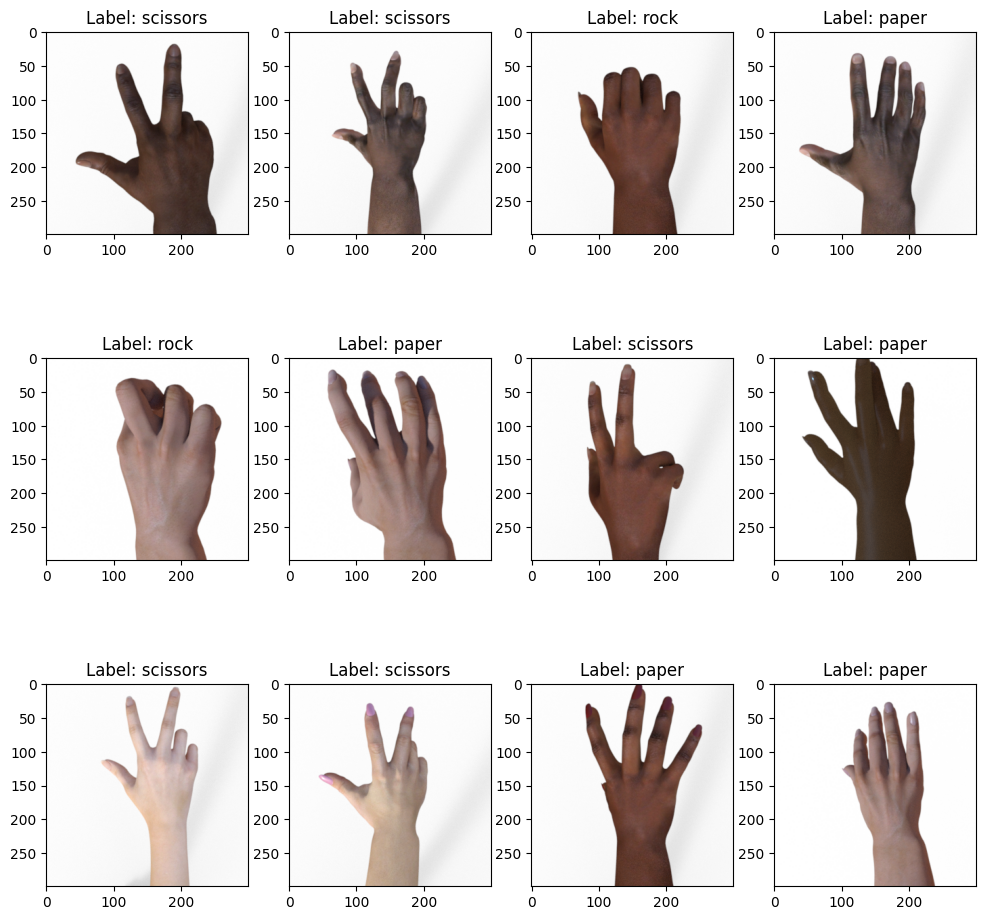

In [6]:
from dataprocessing import preview_dataset
# Explore raw training dataset images.
preview_dataset(dataset_train_raw, get_label_name)

Now I will pre-process the images in the dataset and create train and test sets.

In [37]:
from dataprocessing import format_example
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [8]:
BATCH_SIZE = 32

dataset_train_shuffled = dataset_train.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train_shuffled = dataset_train.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train_shuffled = dataset_train_shuffled.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [9]:
print(dataset_train_shuffled)
print(dataset_test_shuffled)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


## Training AlexNet

Finally, we can implement AlexNet using `tensorflow.keras.Sequential()`.

In [10]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=(150,150,3)), # In the original architecture, the input shape was 224,224,3
        tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=5, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu'),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax') # In the original architecture, the output had 1000 neurons.
    ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 96)        34944     
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 256)       614656    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 384)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 384)         1

Let's get `tf.keras.optimizers.SGD()` and train the model for 50 epochs we can then plot the training history.

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.009)

In [13]:
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=model.fit(dataset_train_shuffled, epochs=50, validation_data=dataset_test_shuffled)

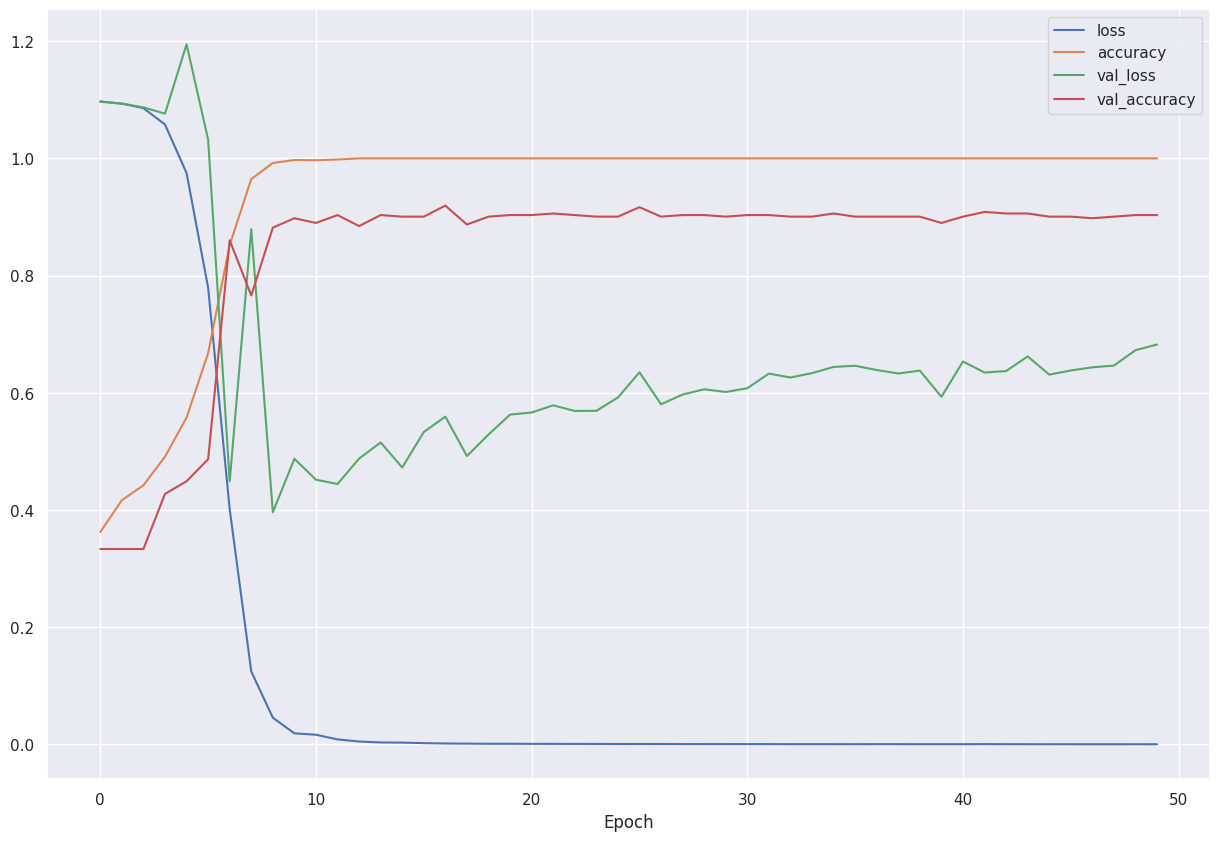

In [15]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

The model seems to perform well on this dataset. Let's see if we will get similar results on TF Flowers Dataset.

# TF Flowers Dataset

I will now load the TF Flowers Dataset and proceed to train the model on this dataset. During the training process, I will employ the various learning rate schedulers that we previously discussed.

In [ ]:
#https://medium.com/@nutanbhogendrasharma/tensorflow-image-classification-with-tf-flowers-dataset-e36205deb8fc : Credit for loading dataset
(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

In [19]:
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

In [20]:
num_classes=5

In [21]:
num_training_examples = 0
num_validation_examples = 0
for example in training_set:
    num_training_examples += 1
for example in validation_set:
    num_validation_examples += 1
print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))

Total Number of Classes: 5
Total Number of Training Images: 2569
Total Number of Validation Images: 1101 



In [23]:
from dataprocessing import format_image

BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
print(train_batches)
print(validation_batches)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


Let's visualize one of the instances from the dataset.

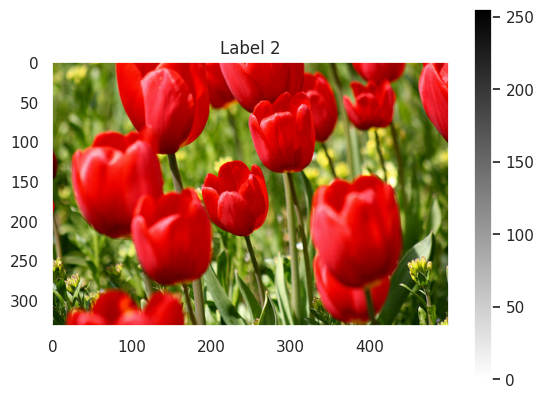

In [24]:
for image, label in training_set.take(5):
    break
image = image.numpy()
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(label))
plt.colorbar()
plt.grid(False)
plt.show()

## AlexNet using Functional API

The following implementation is quite similar to the one we had above while training the model on the Rock-Papers-Scissors dataset. The main thing I added is batch normalization layers. You can set them true to see what they change in terms of validation error.

In [25]:
import tensorflow as tf

class AlexNet(tf.keras.Model):
    def __init__(self, num_classes, batch_norm=False):
        super(AlexNet, self).__init__()
        self.batch_norm = batch_norm
        self.conv1 = tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu')
        self.conv2 = tf.keras.layers.Conv2D(filters=256, kernel_size=5, activation='relu')
        self.maxpool1 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)
        self.conv3 = tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu')
        self.maxpool2 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)
        self.conv4 = tf.keras.layers.Conv2D(filters=384, kernel_size=3, activation='relu')
        self.conv5 = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu')
        self.maxpool3 = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(4096, activation='relu')
        self.dropout1 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(4096, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
        if self.batch_norm:
            self.batch_norm1 = tf.keras.layers.BatchNormalization()
            self.batch_norm2 = tf.keras.layers.BatchNormalization()
            self.batch_norm3 = tf.keras.layers.BatchNormalization()
            self.batch_norm4 = tf.keras.layers.BatchNormalization()
            self.batch_norm5 = tf.keras.layers.BatchNormalization()

    def call(self, inputs):
        x = self.conv1(inputs)
        if self.batch_norm:
            x = self.batch_norm1(x)
        x = self.conv2(x)
        if self.batch_norm:
            x = self.batch_norm2(x)
        x = self.maxpool1(x)
        x = self.conv3(x)
        if self.batch_norm:
            x = self.batch_norm3(x)
        x = self.maxpool2(x)
        x = self.conv4(x)
        if self.batch_norm:
            x = self.batch_norm4(x)
        x = self.conv5(x)
        if self.batch_norm:
            x = self.batch_norm5(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout1(x)
        x = self.dense2(x)
        x = self.dropout2(x)
        outputs = self.dense3(x)
        return outputs

In [26]:
model=AlexNet(num_classes)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.009)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history=model.fit(train_batches, epochs=50, validation_data=validation_batches)

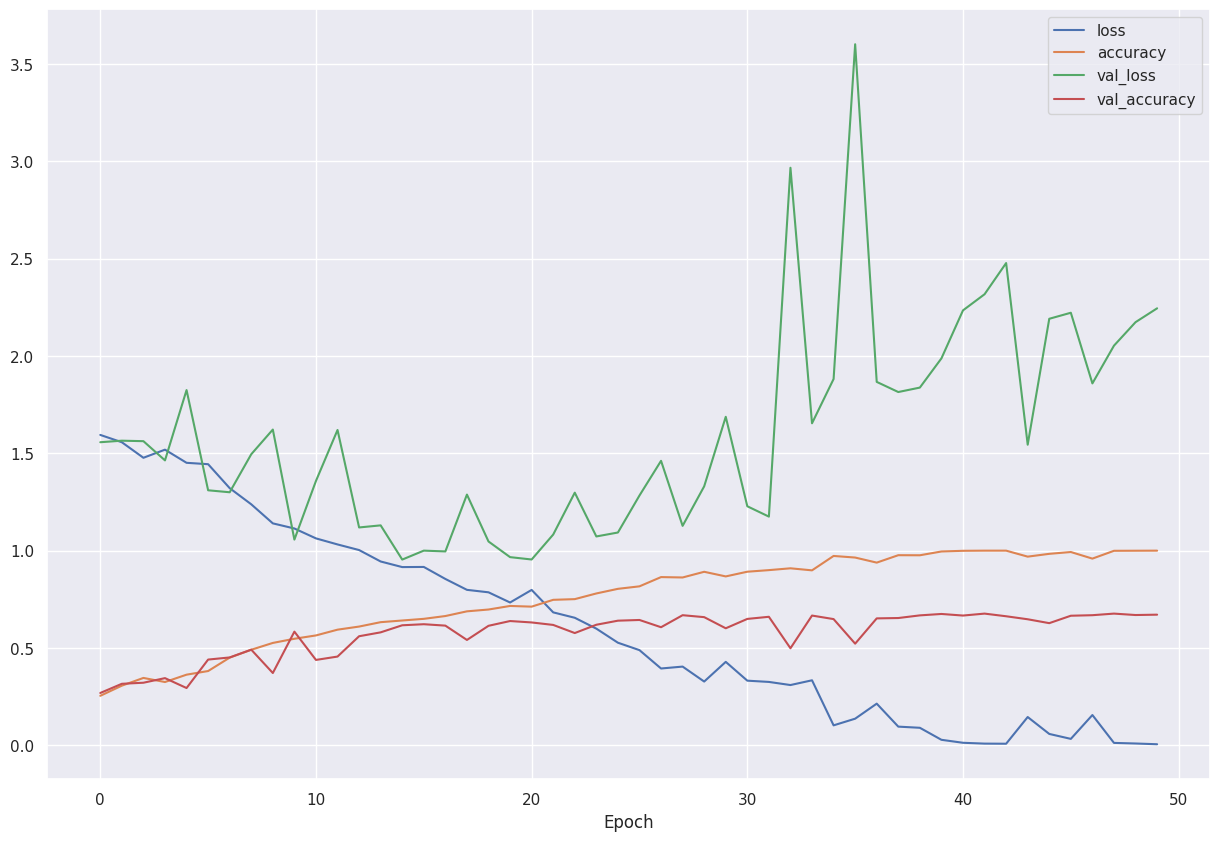

In [28]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

Let's import `WarmUpCallbackEpoch` and see if we can improve the performance further.

In [30]:
from Scheduler import WarmUpCallbackEpoch

In [31]:
model1 = AlexNet(num_classes, batch_norm=False)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)
lr_scheduler = WarmUpCallbackEpoch(num_epochs=50, warmup_epochs=5)
model1.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
 history=model1.fit(train_batches, epochs=50, validation_data=validation_batches,callbacks=[lr_scheduler.warm_up_with_cosine_epoch()])

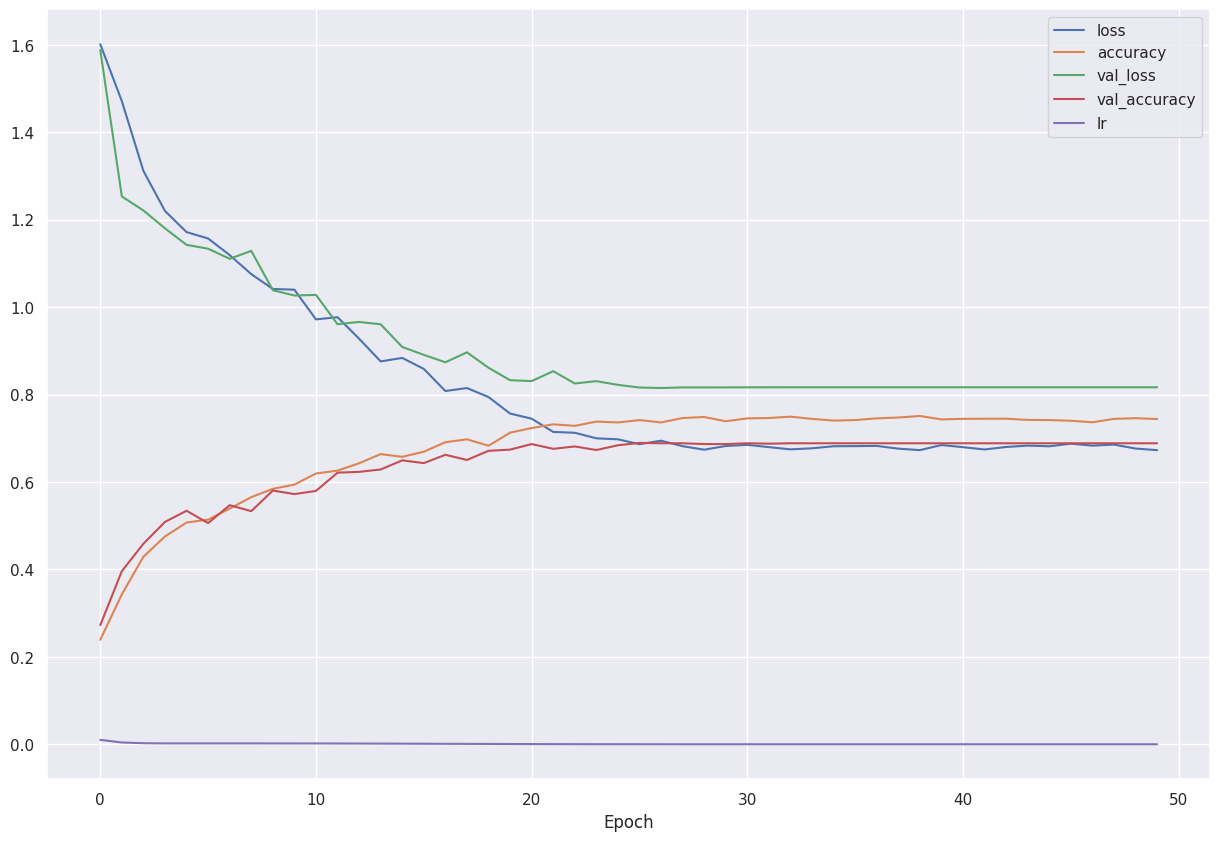

In [33]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

We slightly improved the validation error. Let's see if we can improve it further with the other two learning rate schedulers.

In [34]:
from Scheduler import WarmUpCallbackBatch

In [35]:
model2 = AlexNet(num_classes, batch_norm=False)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)
warmup_callback = WarmUpCallbackBatch(warmup_steps=2000, initial_lr=0.05, num_epochs=50)
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model2.fit(train_batches, epochs=50, validation_data=validation_batches,callbacks=[warmup_callback], use_multiprocessing = True, workers=4)

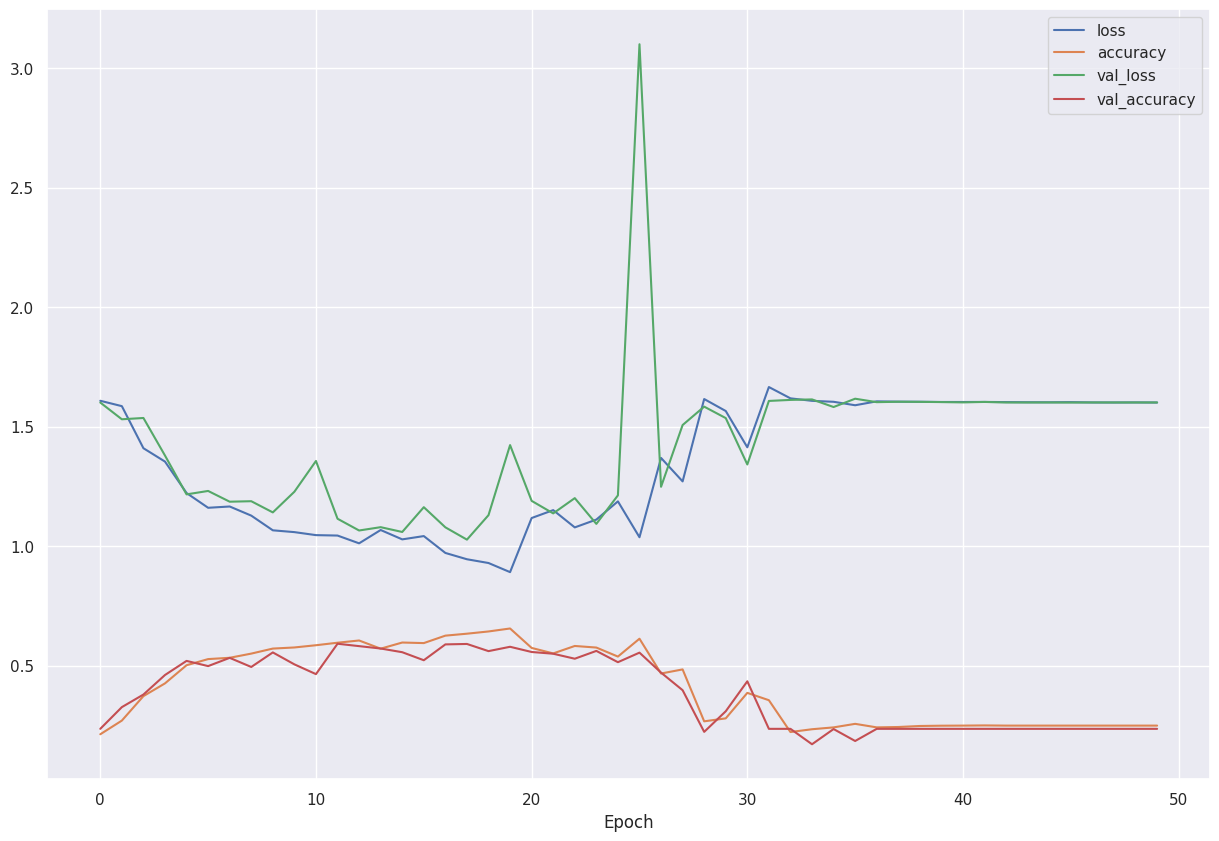

In [38]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

In [39]:
from Scheduler import WarmUpCosineDecayRestarts

In [ ]:
model3=AlexNet(num_classes, batch_norm=False)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
warmup_callback = WarmUpCosineDecayRestarts(num_epochs=50,warmup_steps=30, cycle_length=160)
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model3.fit(train_batches, epochs=50, validation_data=validation_batches,callbacks=[warmup_callback], use_multiprocessing = True, workers=4)

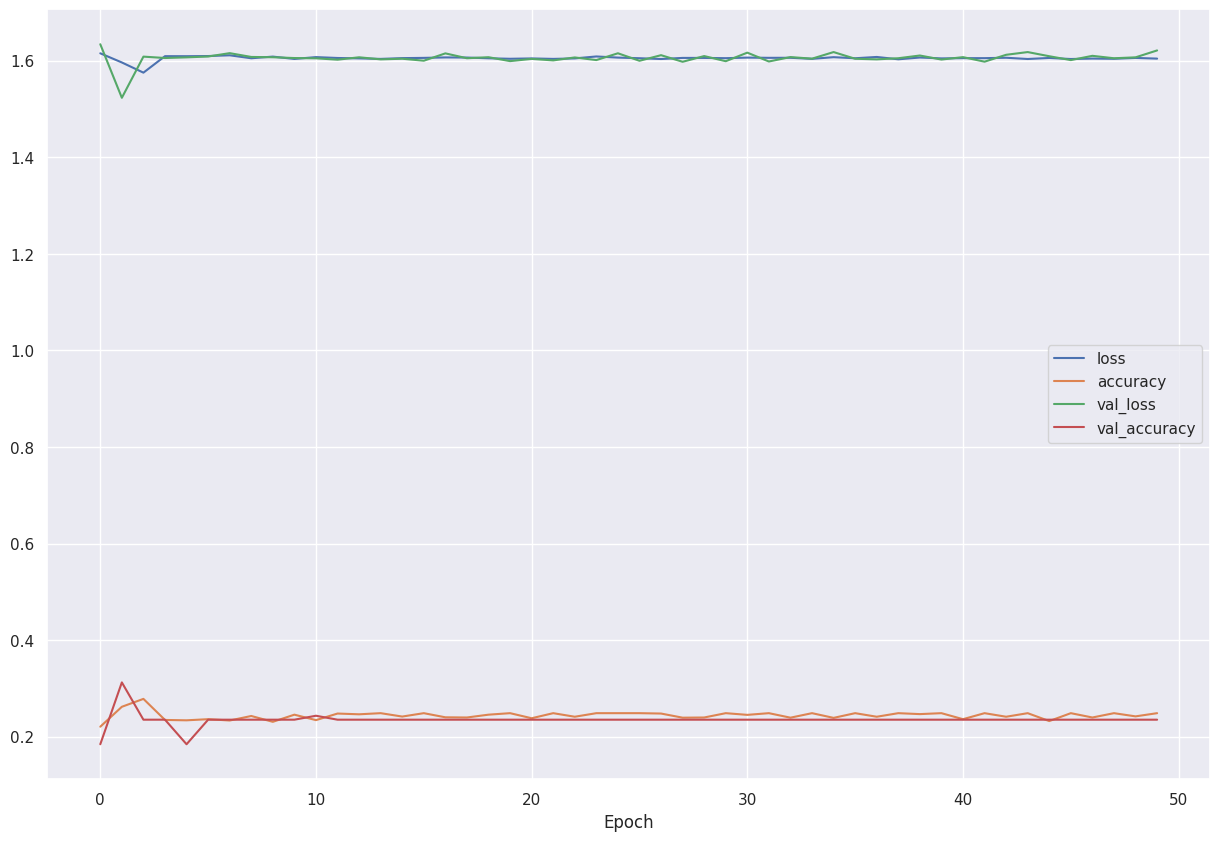

In [41]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

Both `WarmUpCallbackBatch` and `WarmUpCosineDecayRestarts` did not improve the performance further. In fact, with some tuning the results with `WarmUpCallbackBatch` can surpass the one with `WarmUpCallbackEpoch`, however I chose not to tune the schedulers for getting the best result as it is not my main focus to compare them in this notebook.

I highly recommend setting `batch_norm=True`and see what changes in terms of validation performance.

## Resources:

1. [Introduction to The Architecture of Alexnet](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/)
2. [AlexNet Architecture: A Complete Guide](https://www.kaggle.com/code/blurredmachine/alexnet-architecture-a-complete-guide)
3. [Deep Convolutional Neural Networks (AlexNet)](https://d2l.ai/chapter_convolutional-modern/alexnet.html)
4. [TF Implementing AlexNet in TensorFlow 2.0](https://datahacker.rs/tf-alexnet/)
5. [Difference between Local Response Normalization and Batch Normalization](https://towardsdatascience.com/difference-between-local-response-normalization-and-batch-normalization-272308c034ac)
6. [Concept of AlexNet:- Convolutional Neural Network](https://medium.com/analytics-vidhya/concept-of-alexnet-convolutional-neural-network-6e73b4f9ee30#:~:text=the%20completion%20afterward.-,The%20Architecture%20of%20AlexNet,over%20the%201000%20class%20labels.)
7. [AlexNet Architecture](https://hackmd.io/@imkushwaha/alexnet)
8. [AlexNet Architecture Explained](https://medium.com/analytics-vidhya/alexnet-architecture-explained-5d19e3dca2bb)
9. [AlexNet](https://towardsdatascience.com/alexnet-8b05c5eb88d4)

# ZFNet

ZFNet, short for Zeiler and Fergus Network, is a deep convolutional neural network architecture that gained prominence as a result of the ImageNet Challenge in 2013. It was developed by Matthew D. Zeiler and Rob Fergus, researchers at the New York University. ZFNet is the adjustment made to the original AlexNet's architecture. The researchers realized that the overly aggressive downsampling in the early layers of AlexNet led to a loss of fine-grained information crucial for accurate classification. To address this, ZFNet incorporated smaller receptive fields in the first layer, resulting in higher-resolution feature maps that preserved more details.

Let's implement the architecture and train it on TF Flowers dataset.

In [42]:
class ZFNet(Model):
    def __init__(self, num_classes):
        super(ZFNet, self).__init__()

        # Layer 1 (Convolutional + ReLU + Max Pooling)
        self.conv1 = Conv2D(96, (7, 7), strides=(2, 2), padding='same', activation='relu')
        self.maxpool1 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')

        # Layer 2 (Convolutional + ReLU + Max Pooling)
        self.conv2 = Conv2D(256, (5, 5), strides=(2, 2), padding='same', activation='relu')
        self.maxpool2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')

        # Layer 3 (Convolutional + ReLU)
        self.conv3 = Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu')

        # Layer 4 (Convolutional + ReLU)
        self.conv4 = Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu')

        # Layer 5 (Convolutional + ReLU + Max Pooling)
        self.conv5 = Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu')
        self.maxpool5 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')

        # Fully Connected layers
        self.flatten = Flatten()
        self.fc1 = Dense(4096, activation='relu')
        self.fc2 = Dense(4096, activation='relu')
        self.fc3 = Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.maxpool5(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# Create an instance of the ZFNet model
num_classes = 5 
model = ZFNet(num_classes)

# Compile and print model summary
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.009), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, 224, 224, 3))
model.summary()

Model: "zf_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          multiple                  14208     
                                                                 
 max_pooling2d_15 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          multiple                  614656    
                                                                 
 max_pooling2d_16 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          multiple                  885120    
                                                                 
 conv2d_28 (Conv2D)          multiple                  13274

In [ ]:
history=model.fit(train_batches, epochs=50, validation_data=validation_batches)

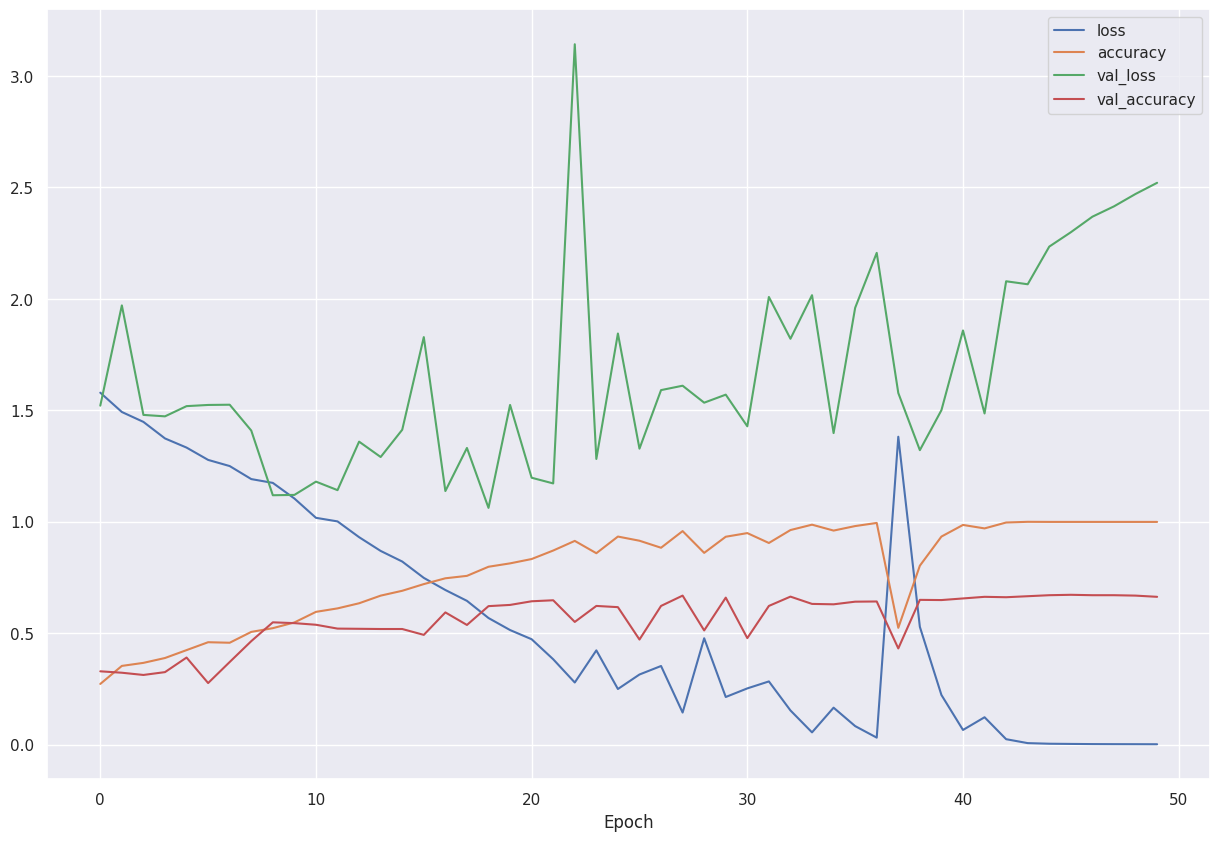

In [44]:
sns.set_theme()
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

The model performed similarly to our baseline model with AlexNet.

## Additional Sources:

I highly recommend reading the following articles and perhaps the original paper if you have time. ZFNet authors introduced some important techniques such as deconvolutional layers which allowed researchers to understand and interpret the network's inner workings by reconstructing the inputs that maximally activated certain feature maps. This visual analysis helped in gaining insights into the hierarchical representations learned by the network. Therefore, I believe it is important to spend some time on this paper and understand it.

1. [ZFNet: An Explanation of Paper with Code](https://towardsdatascience.com/zfnet-an-explanation-of-paper-with-code-f1bd6752121d)
2. [Review: ZFNet — Winner of ILSVRC 2013 (Image Classification)](https://medium.com/coinmonks/paper-review-of-zfnet-the-winner-of-ilsvlc-2013-image-classification-d1a5a0c45103)
3. [Visualizing and Understanding Convolutional Networks - Original Paper](https://arxiv.org/abs/1311.2901)

## General References

The references below are the main sources I used for preparing the notebooks in this repository.

1. Murphy, K. P. (2022). Probabilistic machine learning: an introduction. MIT press.
2. Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
3. Chollet, F. (2021). Deep learning with Python. Simon and Schuster.
4. Kar, K. (2020). Mastering Computer Vision with TensorFlow 2. x: Build advanced computer vision applications using machine learning and deep learning techniques. Packt Publishing Ltd.
5. Planche, B., & Andres, E. (2019). Hands-On Computer Vision with TensorFlow 2: Leverage deep learning to create powerful image processing apps with TensorFlow 2.0 and Keras. Packt Publishing Ltd.
6. Lakshmanan, V., Görner, M., & Gillard, R. (2021). Practical Machine Learning for Computer Vision. " O'Reilly Media, Inc.".